In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('bank.csv')

In [4]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [5]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [6]:
# statistical of numerical attributes
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_numerical.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

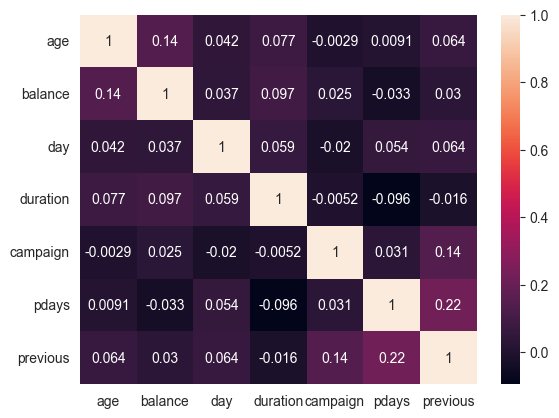

In [7]:
sns.heatmap(df_numerical.corr(), annot=True);

C:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


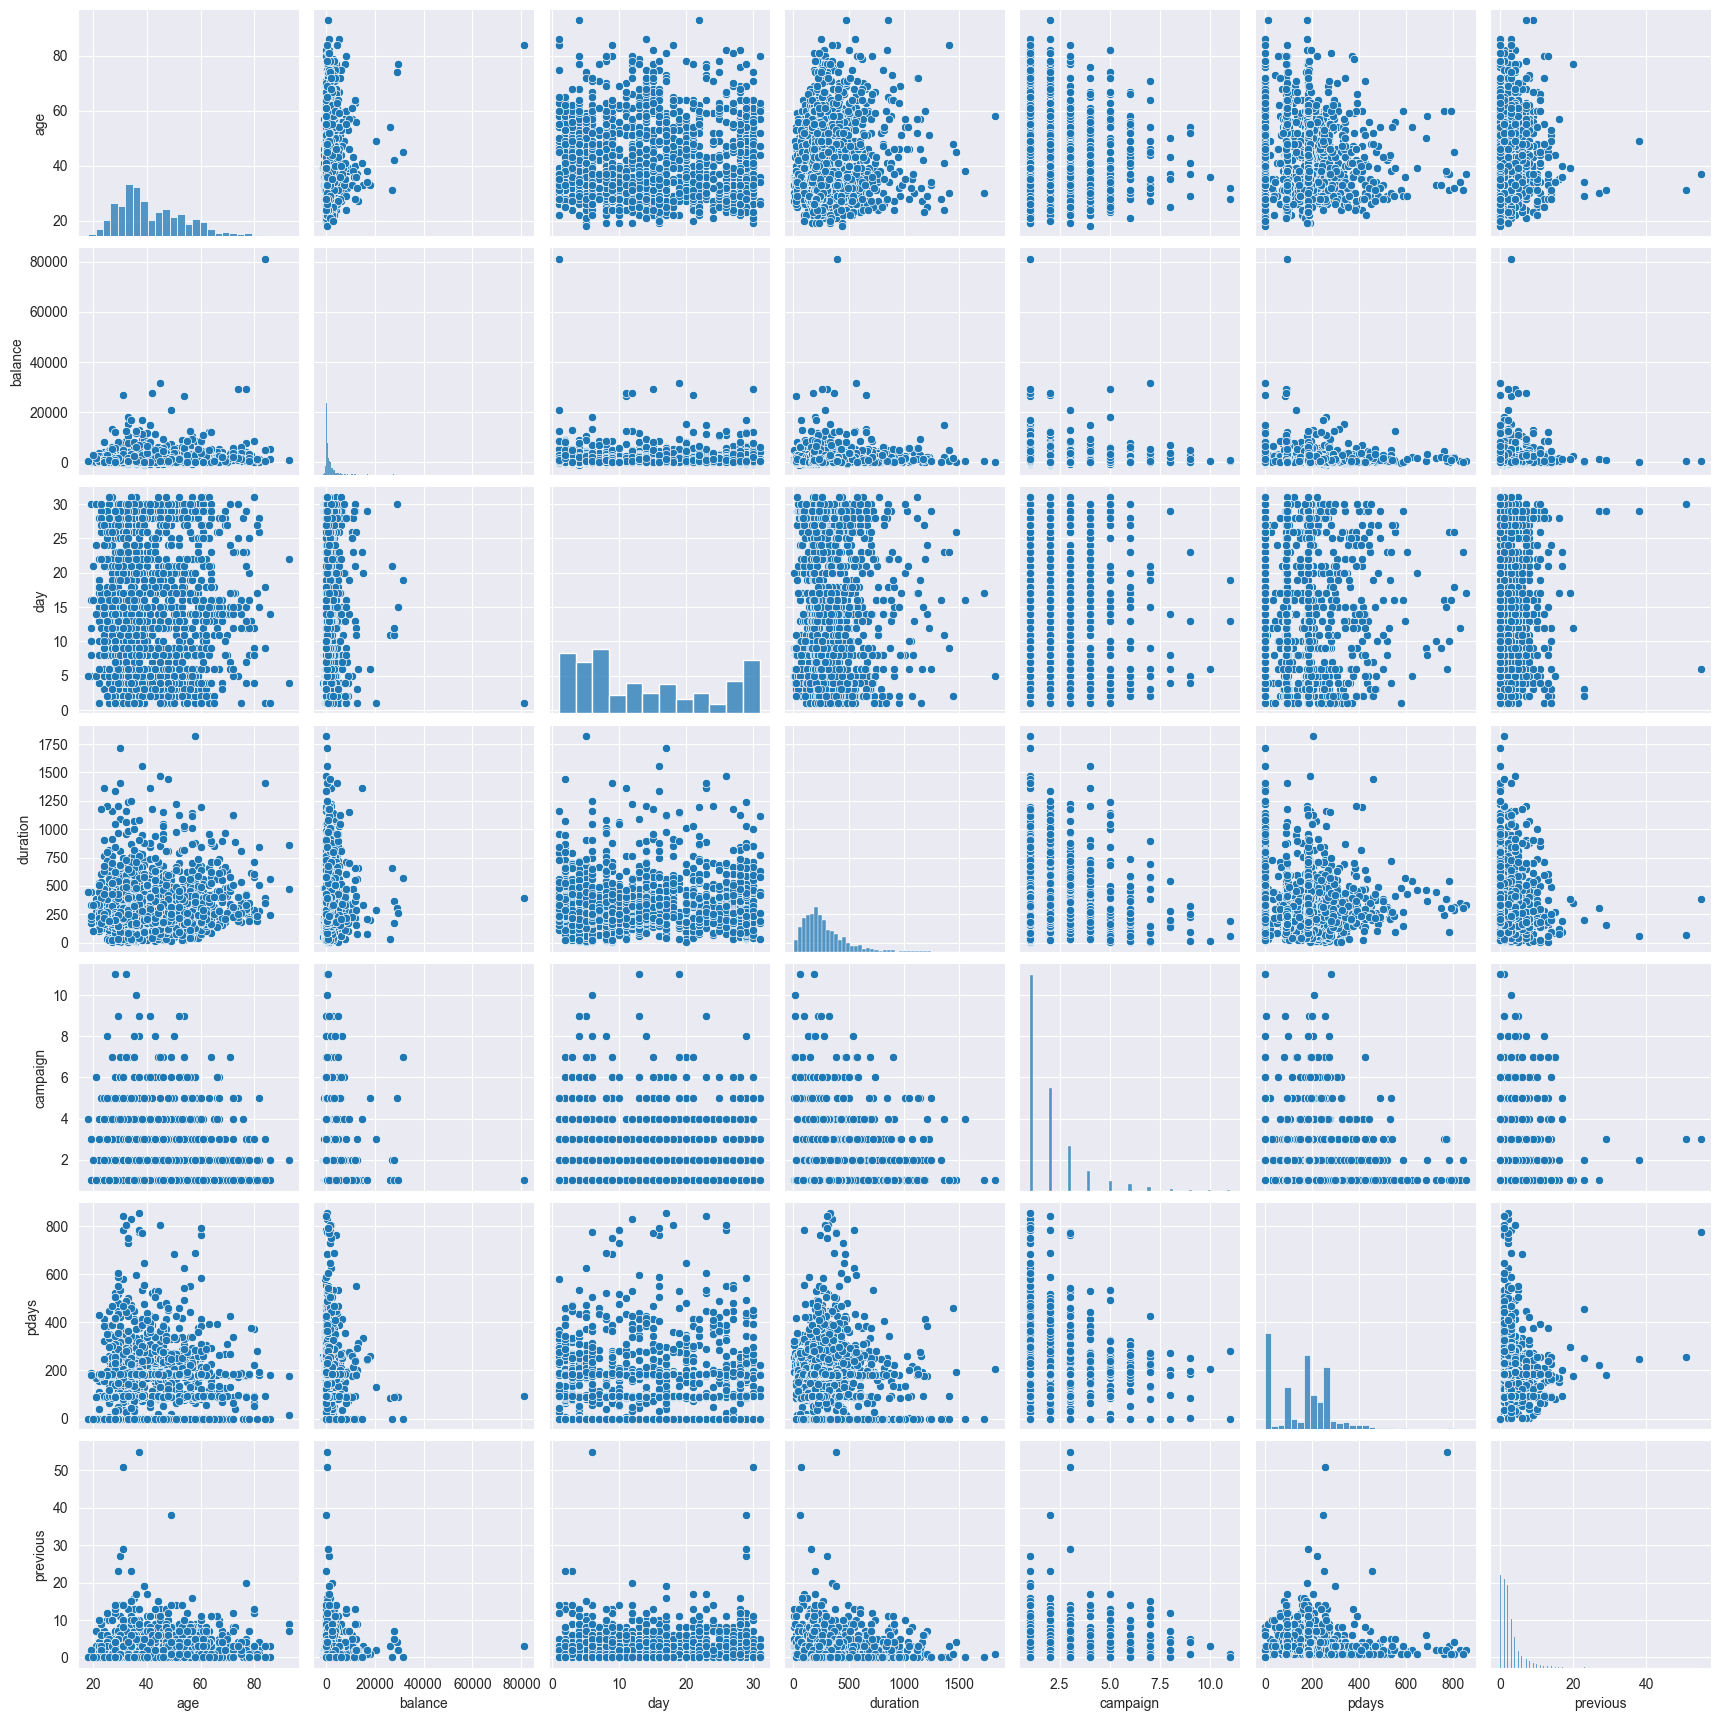

In [8]:
sns.pairplot(data=df_numerical.dropna())

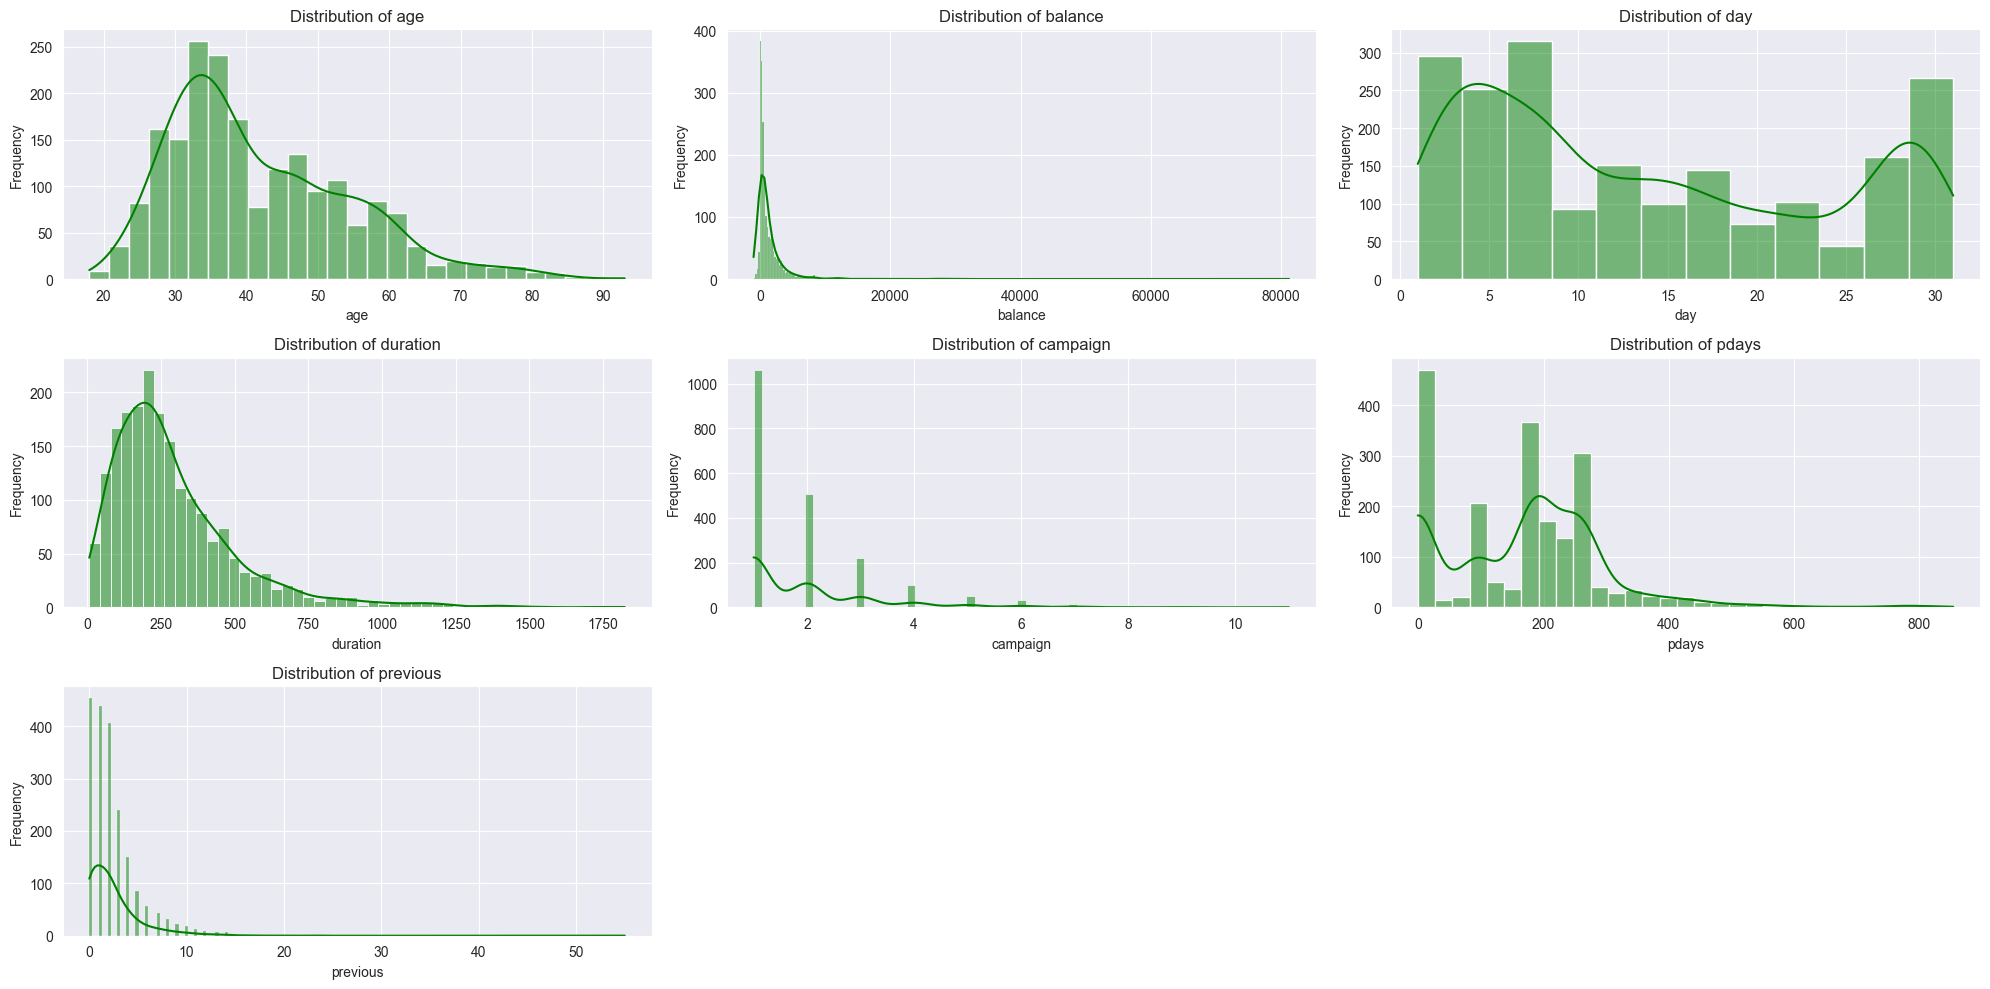

In [9]:
# Histogram
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# create histograms for each of the attributes
for i, column in enumerate(df_numerical.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_numerical[column], kde=True, color='green')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

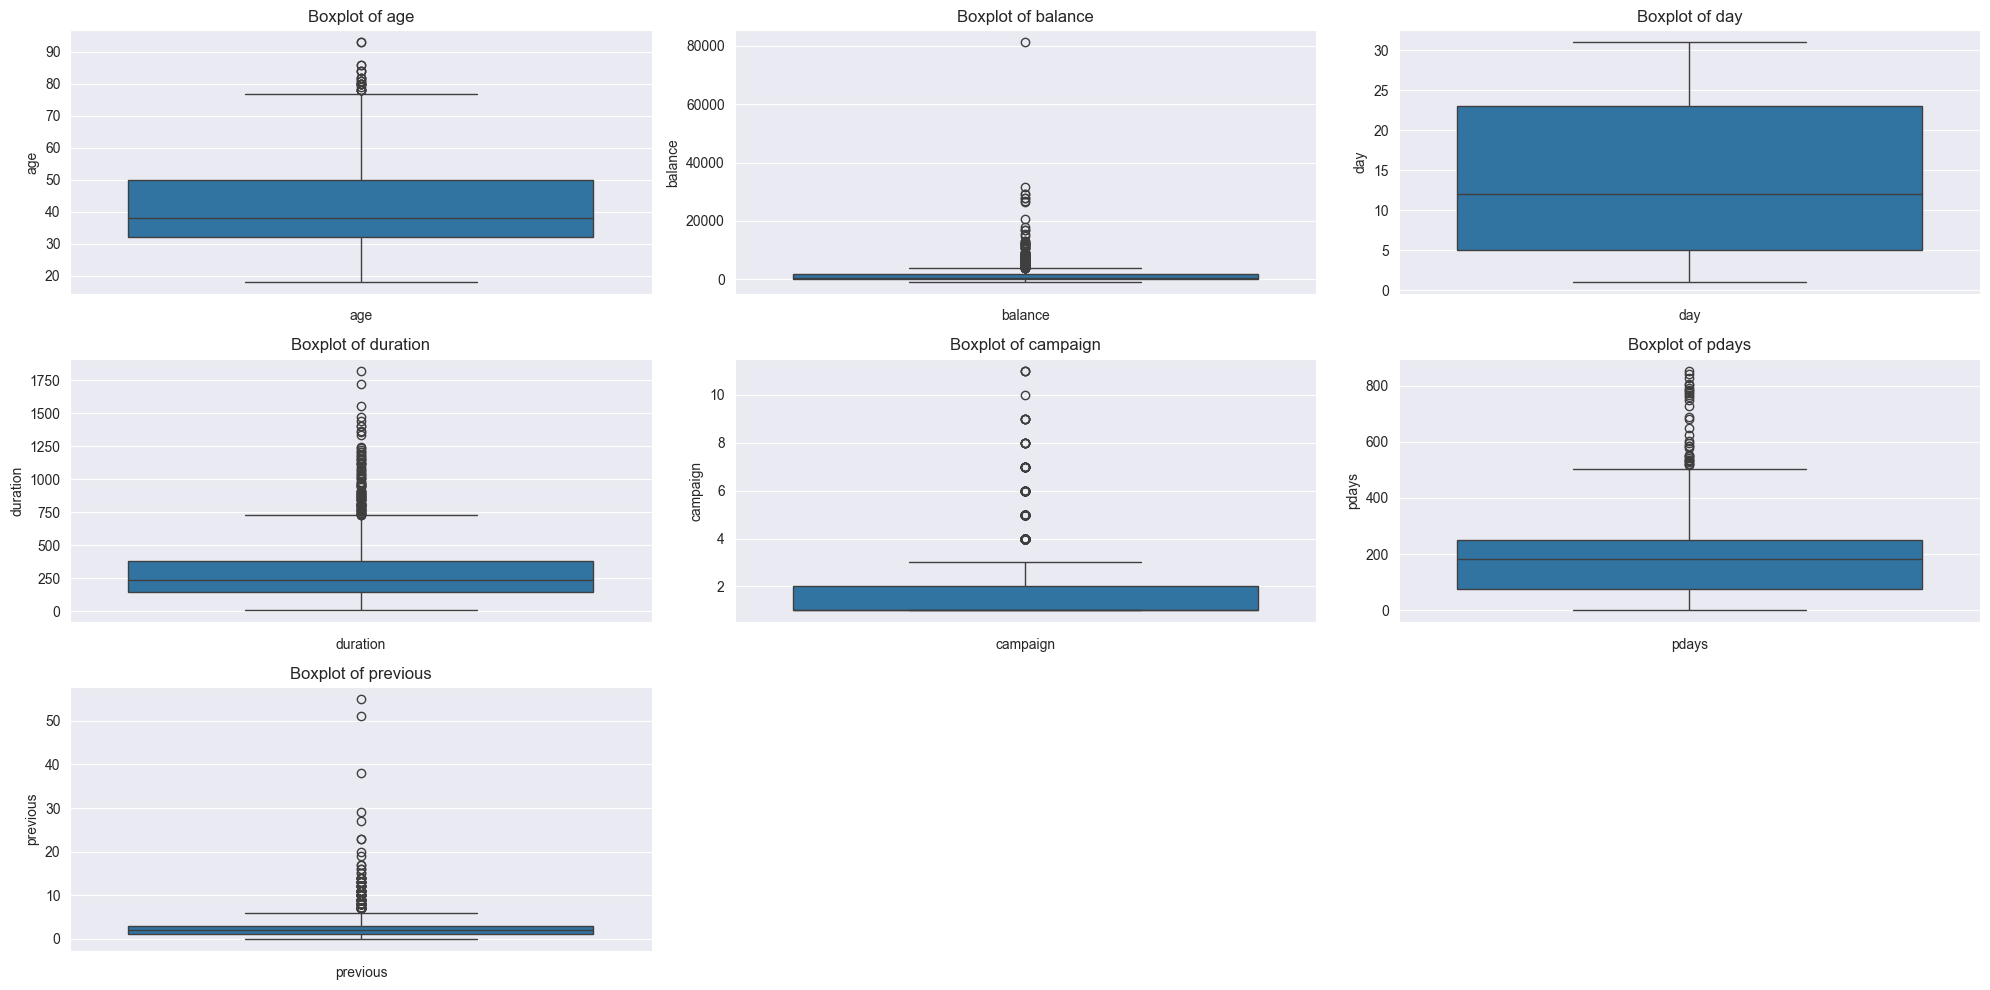

In [10]:
# Setting up the figure size and grid
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Creating boxplots for each attribute
for i, column in enumerate(df_numerical.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_numerical[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [19]:
# statistic of categorical attributes
df_categorical = df.select_dtypes(include=['object'])
df_categorical

job   marital  education default housing loan    contact month  \
0       technician    single   tertiary      no     yes   no   cellular   apr   
1       technician  divorced  secondary      no     yes  yes   cellular   apr   
2          retired   married  secondary      no     yes  yes   cellular   apr   
3      blue-collar   married  secondary      no     yes  yes   cellular   apr   
4          retired   married  secondary      no     yes   no   cellular   apr   
...            ...       ...        ...     ...     ...  ...        ...   ...   
1995       student    single        NaN      no      no   no   cellular   sep   
1996        admin.    single  secondary      no      no   no   cellular   sep   
1997       retired   married    primary      no      no   no  telephone   sep   
1998      services   married    primary      no     yes   no        NaN   sep   
1999  entrepreneur   married  secondary      no      no   no   cellular   sep   

     poutcome subscribed  
0     failure         no  
1     failure         no  
2     failure         no  
3     failure         no  
4     failure         no  
...       ...        ...  
1995      NaN        yes  
1996      NaN        yes  
1997      NaN        yes  
1998      NaN        yes  
1999      NaN        yes  

[2000 rows x 10 columns]

## Task 2

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline



In [21]:
# Load the data
df = pd.read_csv('bank.csv')

In [28]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [29]:
df_numerical

age  balance  day  duration  campaign  pdays  previous
0     32.0      392    1       957         2    131         2
1     39.0      688    1       233         2    133         1
2     59.0     1035    1       126         2    239         1
3     47.0      398    1       274         1    238         2
4     54.0     1004    1       479         1    307         1
...    ...      ...  ...       ...       ...    ...       ...
1995  20.0     2785   16       327         2     -1         0
1996  28.0      127   16      1334         2     -1         0
1997  81.0     1154   17       231         1     -1         0
1998  46.0     4343   20       185         1     -1         0
1999  40.0     6403   22       208         2     -1         0

[2000 rows x 7 columns]

In [30]:
df_categorical

job   marital  education default housing loan    contact month  \
0       technician    single   tertiary      no     yes   no   cellular   apr   
1       technician  divorced  secondary      no     yes  yes   cellular   apr   
2          retired   married  secondary      no     yes  yes   cellular   apr   
3      blue-collar   married  secondary      no     yes  yes   cellular   apr   
4          retired   married  secondary      no     yes   no   cellular   apr   
...            ...       ...        ...     ...     ...  ...        ...   ...   
1995       student    single        NaN      no      no   no   cellular   sep   
1996        admin.    single  secondary      no      no   no   cellular   sep   
1997       retired   married    primary      no      no   no  telephone   sep   
1998      services   married    primary      no     yes   no        NaN   sep   
1999  entrepreneur   married  secondary      no      no   no   cellular   sep   

     poutcome subscribed  
0     failure         no  
1     failure         no  
2     failure         no  
3     failure         no  
4     failure         no  
...       ...        ...  
1995      NaN        yes  
1996      NaN        yes  
1997      NaN        yes  
1998      NaN        yes  
1999      NaN        yes  

[2000 rows x 10 columns]

In [31]:
df_categorical.describe()

job  marital  education default housing  loan   contact month  \
count         1990     2000       1896    2000    2000  2000      1809  2000   
unique          11        3          3       2       2     2         2    12   
top     management  married  secondary      no      no    no  cellular   feb   
freq           461     1111        995    1985    1037  1750      1663   404   

       poutcome subscribed  
count      1546       2000  
unique        3          2  
top     failure         no  
freq        955       1000

In [32]:
 # Check missing values
df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [33]:
# Describe different types of job, maybe fill in accordingly with the distribution?
df['job'].value_counts()

job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: count, dtype: int64

In [38]:

df['age'].value_counts()
# will probably use the mean for missing age values

age
33.0    95
35.0    90
31.0    87
34.0    84
32.0    77
        ..
86.0     2
73.0     2
81.0     2
79.0     1
18.0     1
Name: count, Length: 68, dtype: int64

In [39]:
df['education'].value_counts()
# will probablu use the same proportion to fill in the null values

education
secondary    995
tertiary     684
primary      217
Name: count, dtype: int64

In [40]:
df['contact'].value_counts() # will remove this column possibly

contact
cellular     1663
telephone     146
Name: count, dtype: int64

In [ ]:
# new feature to be created , possibly will be the age bin